# FT4/FT3 for various residual thyroid levels

In [1]:
using Revise
using Thyrosim
using Plots
using CSV
using DataFrames
gr(fmt=:png)
Plots.scalefontsizes(2) # makes font size bigger in plots

"""
Converts TT4 (μmol) to FT4 (μmol) using Thyrosim's internal 4th order polynomial
"""
function FT4(TT4::Float64)
    return (0.000289 + (0.000214 * TT4) + (0.000128 * TT4^2) - (8.83e-6 * TT4^3)) * TT4
end

"""
Converts TT4 (μmol, Thyrosim output q1) to FT4 (ng/L)
"""
function TT4_to_FT4(TT4::Float64, Vp::Float64)
    return FT4(TT4) * 777 / Vp * 1000 * 0.45
end

"""
Converts TT3 (μmol) to FT3 (ng/L = pg/mL) 
"""
function TT3_to_FT3(TT4::Float64, TT3::Float64, Vp::Float64)
    return FT3(TT4, TT3) * 651 / Vp * 1000 * 0.50
end

"""
Converts TT3 (μmol) to FT3 (μmol) using Thyrosim's internal 4th order polynomial
"""
function FT3(TT4::Float64, TT3::Float64)
    return (0.00395 + (0.00185 * TT4) + (0.000610 * TT4^2) - (0.000505 * TT4^3)) * TT3
end

FT3

## Female patients: normal, skinny, obese simulations

In [16]:
sex = false # 1 = male, 0 = female
T4dose = 0.0 # mcg
normal_TSH, normal_TT4, normal_TT3, normal_FT4, normal_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
skinny_TSH, skinny_TT4, skinny_TT3, skinny_FT4, skinny_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
obese_TSH, obese_TT4, obese_TT3, obese_FT4, obese_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
RTFs = [0, 0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0]

# normal female patient
bmi = 22.5
h = 1.6
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 (ng/L)
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])
    
    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(normal_TT4, tt4[end])
    push!(normal_TT3, tt3[end])
    push!(normal_FT4, ft4[end])
    push!(normal_FT3, ft3[end])
    push!(normal_TSH, tsh[end])
end

# skinny female patient
bmi = 17
h = 1.6
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 in ng/L
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])

    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(skinny_TT4, tt4[end])
    push!(skinny_TT3, tt3[end])
    push!(skinny_FT4, ft4[end])
    push!(skinny_FT3, ft3[end])
    push!(skinny_TSH, tsh[end])
end

# obese female patient
bmi = 35
h = 1.6
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 in ng/L
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])
    
    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(obese_TT4, tt4[end])
    push!(obese_TT3, tt3[end])
    push!(obese_FT4, ft4[end])
    push!(obese_FT3, ft3[end])
    push!(obese_TSH, tsh[end])
end

Lets check the resulting T3 with respect to different levels of RTF

In [17]:
[RTFs normal_TT3 normal_FT3]

15×3 Matrix{Float64}:
 0.0    3.43426e-6  6.78266e-6
 0.001  0.596665    1.21183
 0.003  0.690556    1.41361
 0.005  0.728288    1.49605
 0.007  0.752659    1.54972
 0.01   0.779011    1.60806
 0.02   0.830059    1.72237
 0.05   0.900991    1.88391
 0.1    0.960705    2.02239
 0.2    1.0353      2.19847
 0.3    1.092       2.33531
 0.4    1.14596     2.4668
 0.5    1.19561     2.58979
 0.8    1.33141     2.93389
 1.0    1.41182     3.14323

Also, here's the resulting T4 with respect to different levels of RTF

In [18]:
[RTFs normal_TT4 normal_FT4]

15×3 Matrix{Float64}:
 0.0     3.09863e-5   4.02976e-6
 0.001  16.6354       2.26202
 0.003  21.303        2.93367
 0.005  23.3643       3.23567
 0.007  24.746        3.43999
 0.01   26.2498       3.66408
 0.02   29.3323       4.12911
 0.05   33.8639       4.82688
 0.1    37.8694       5.45789
 0.2    43.0314       6.29132
 0.3    47.2323       6.98672
 0.4    51.1288       7.64579
 0.5    54.8481       8.28774
 0.8    65.1359      10.1306
 1.0    71.3302      11.2893

## Make plot

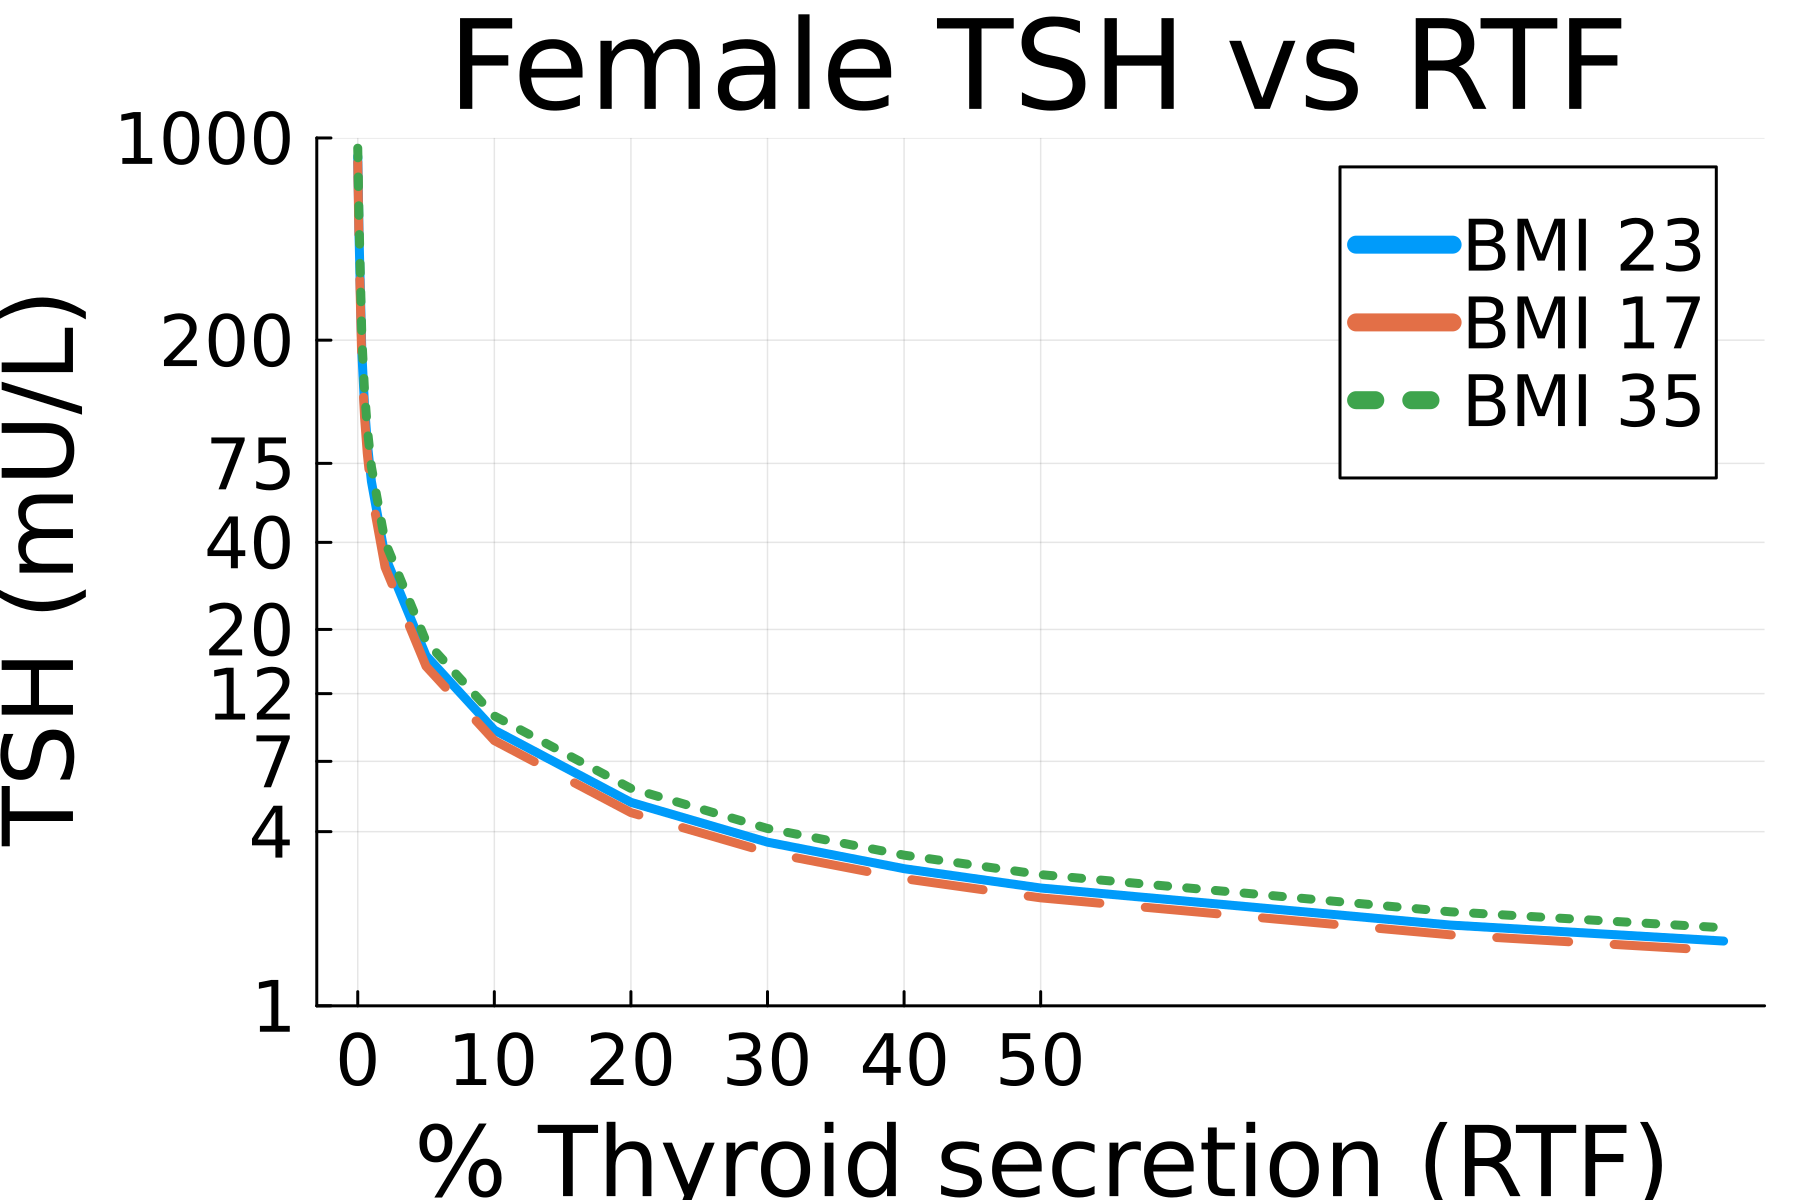

In [19]:
xticks = [string(i) for i in 0:10:50]
yticks = ["1", "4", "7", "12", "20", "40", "75", "200", "1000"]
tsh_plot = plot(RTFs, normal_TSH, yaxis=:log, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:solid, title="Female TSH vs RTF", ylim=(1, 1000),
    xticks = (0.0:0.1:0.5, xticks), yticks=([1,4,7,12,20,40,75,200,1000], yticks),
    dpi=300)
plot!(tsh_plot, RTFs, skinny_TSH, yaxis=:log, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:dash)
plot!(tsh_plot, RTFs, obese_TSH, yaxis=:log, label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:dot)

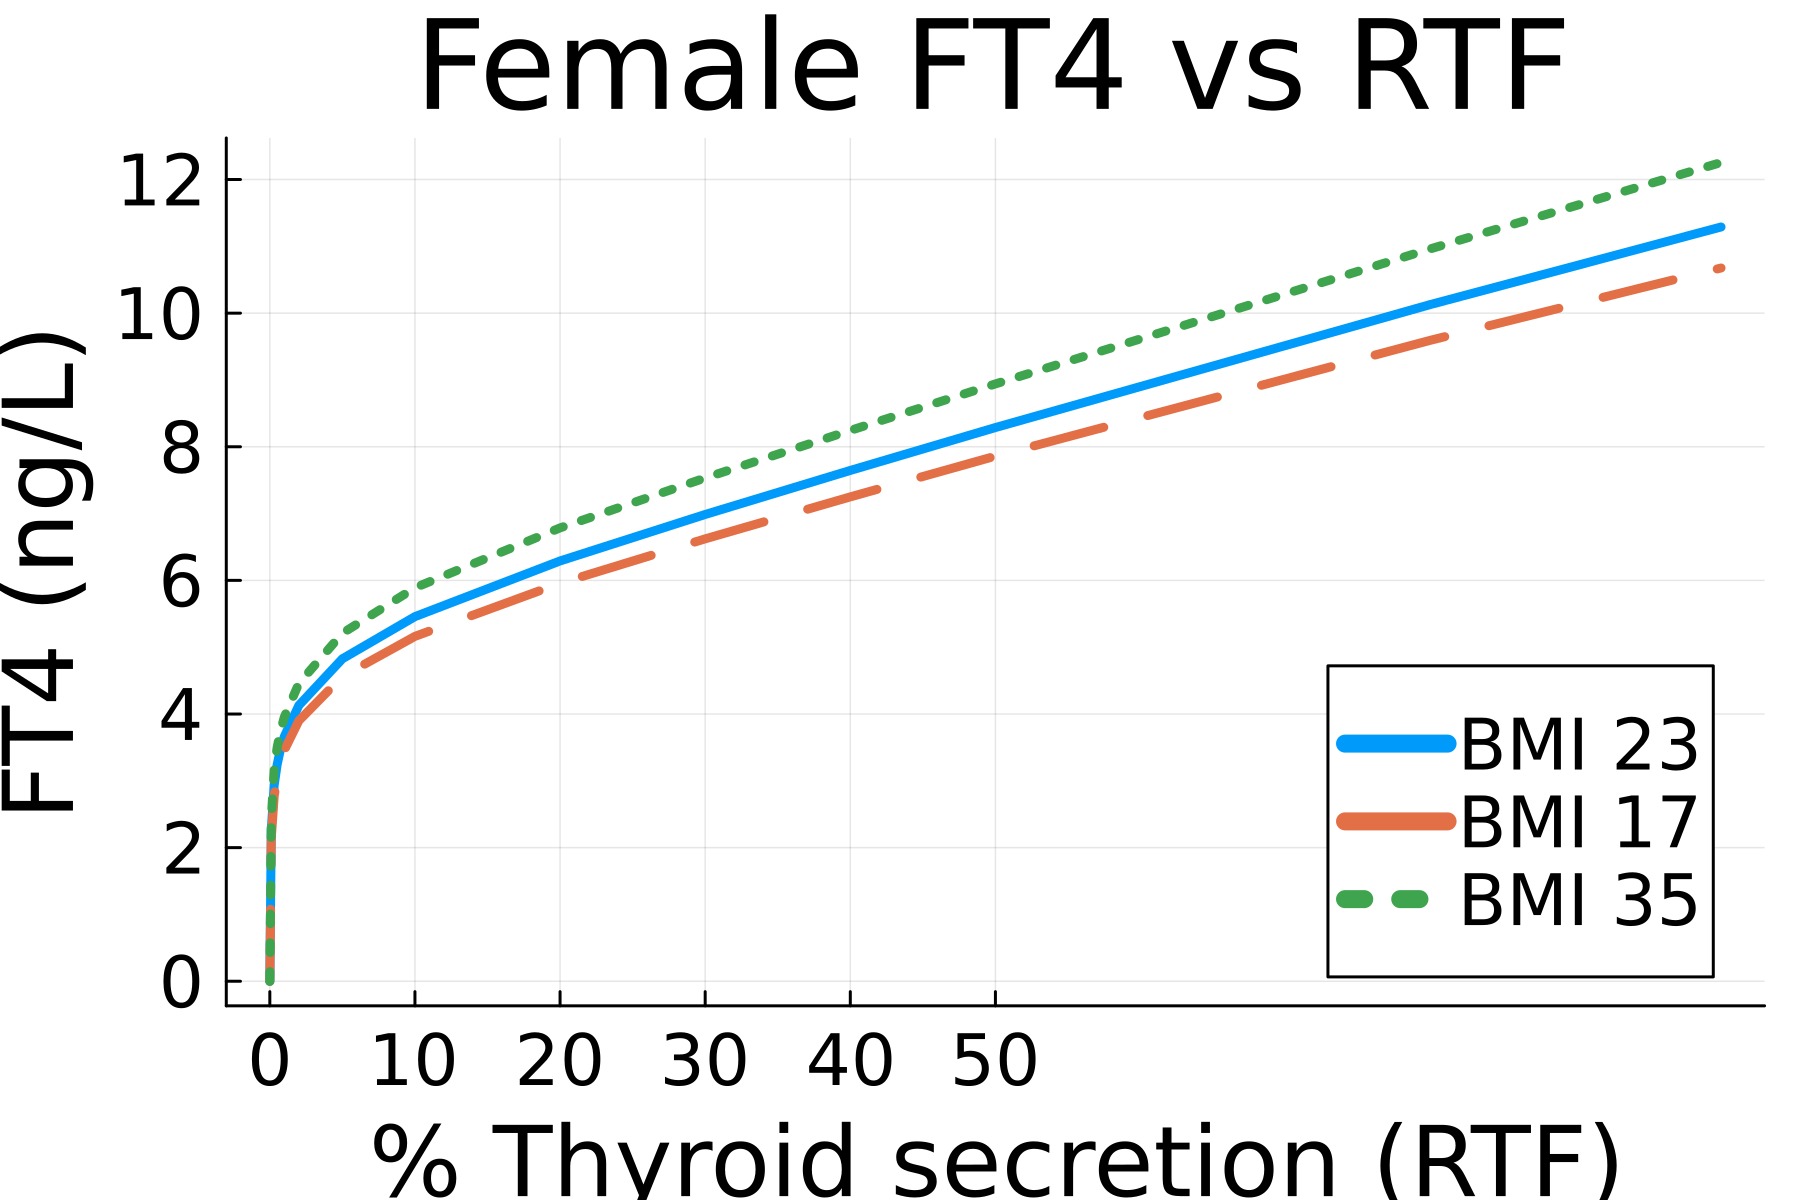

In [20]:
xticks = [string(i) for i in 0:10:50]
t4_plot = plot(RTFs, normal_FT4, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:solid, title="Female FT4 vs RTF",
    xticks = (0.0:0.1:0.5, xticks), legend=:bottomright, dpi=300)
plot!(t4_plot, RTFs, skinny_FT4, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:dash)
plot!(t4_plot, RTFs, obese_FT4,label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:dot)

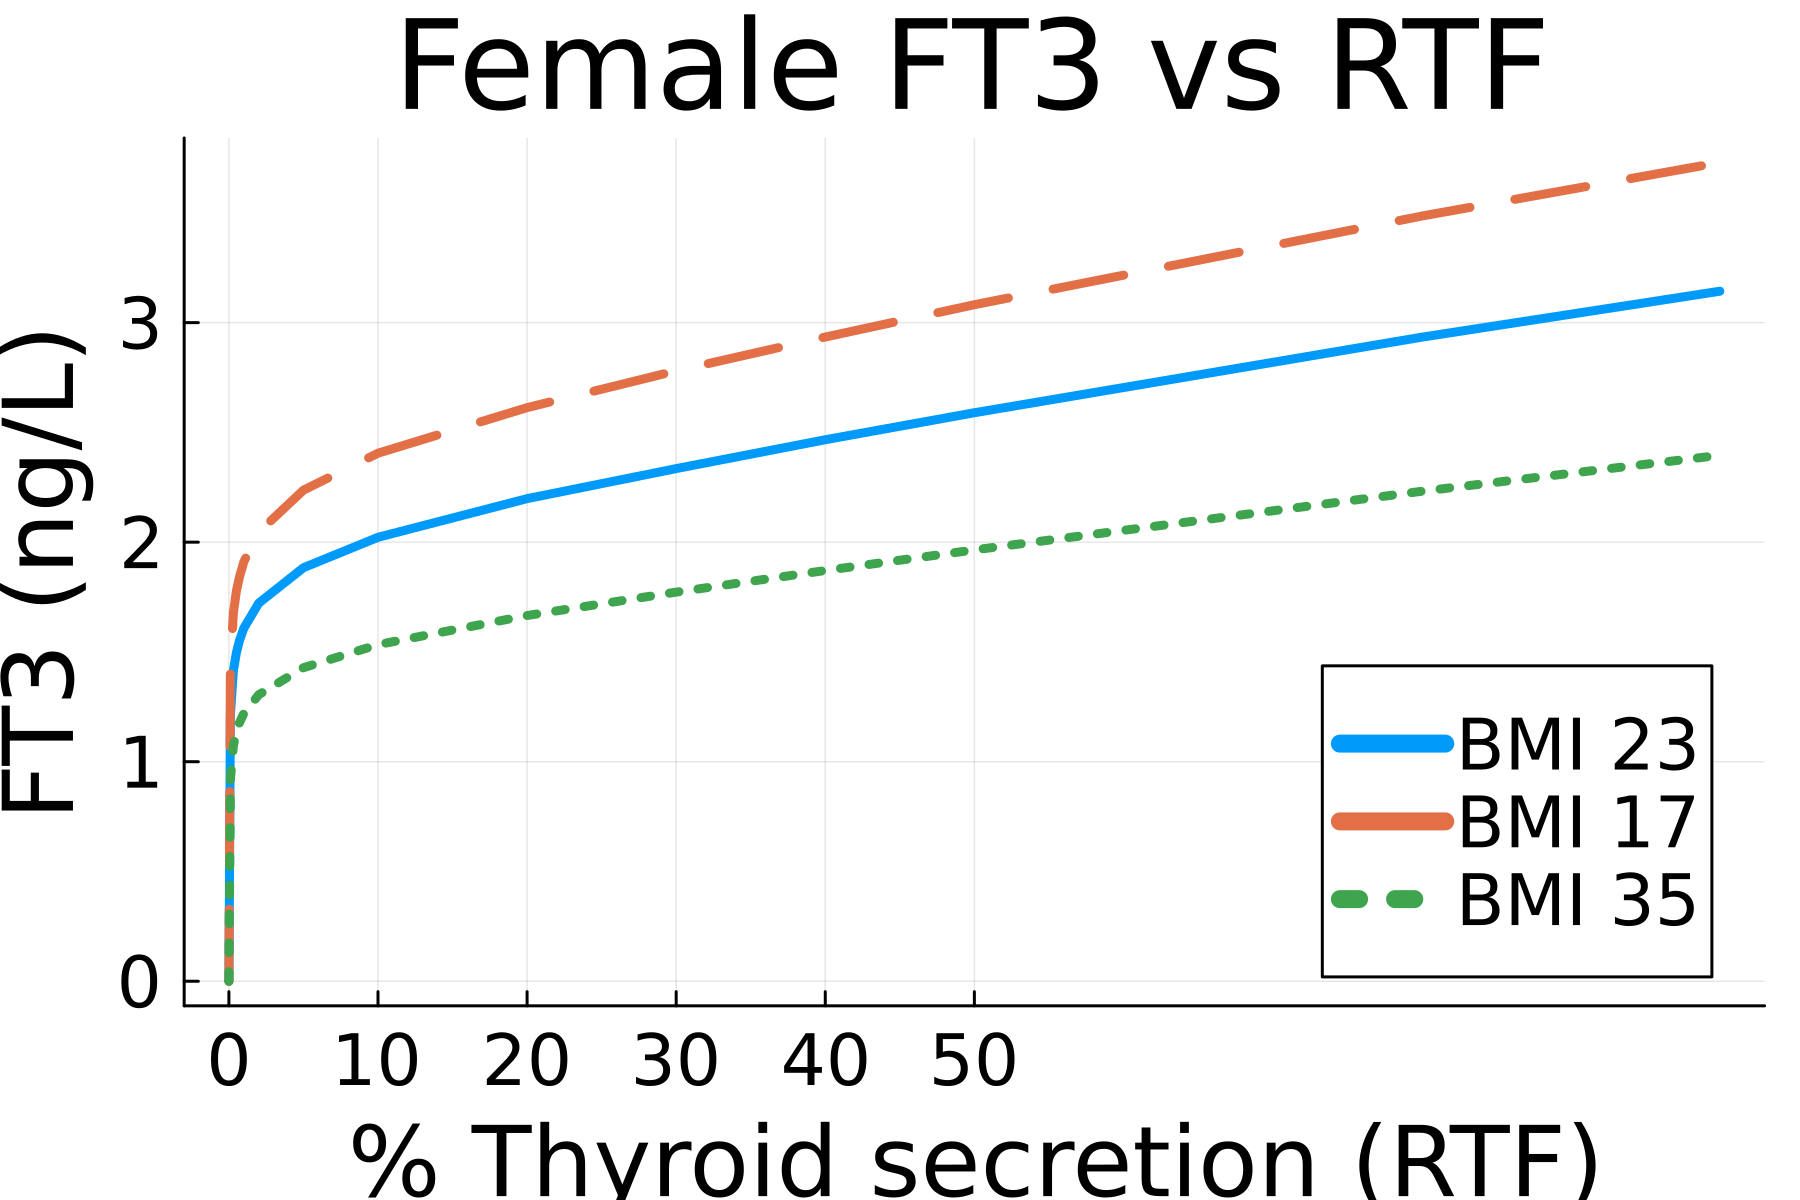

In [21]:
xticks = [string(i) for i in 0:10:50]
t3_plot = plot(RTFs, normal_FT3, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:solid, title="Female FT3 vs RTF",
    xticks = (0.0:0.1:0.5, xticks), legend=:bottomright, dpi=300)
plot!(t3_plot, RTFs, skinny_FT3, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dash)
plot!(t3_plot, RTFs, obese_FT3,label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dot)

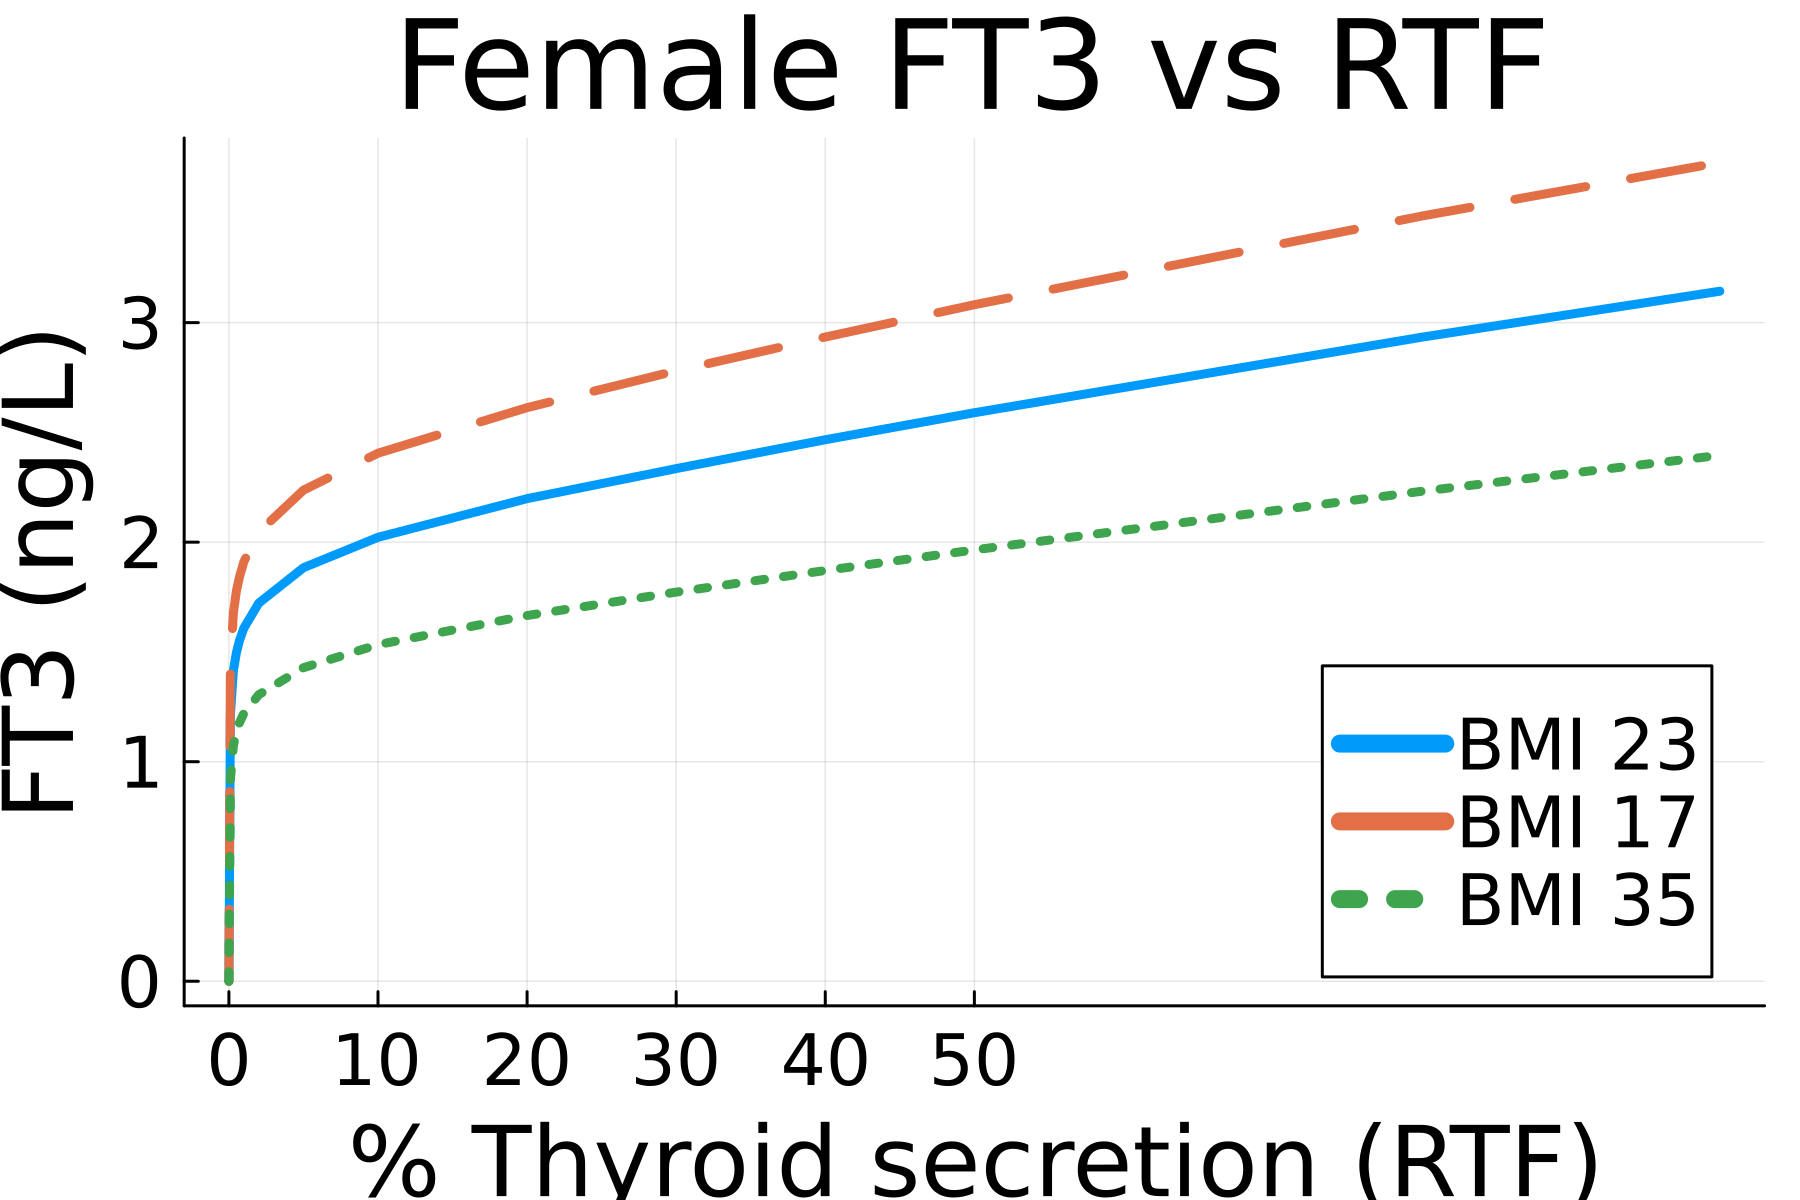

In [22]:
xticks = [string(i) for i in 0:10:50]
t3_plot = plot(RTFs, normal_FT3, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:solid, title="Female FT3 vs RTF",
    xticks = (0.0:0.1:0.5, xticks), legend=:bottomright, dpi=300)
plot!(t3_plot, RTFs, skinny_FT3, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dash)
plot!(t3_plot, RTFs, obese_FT3,label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dot)

## Male patient simulations: normal, skinny, obese

In [10]:
sex = true # 1 = male, 0 = female
T4dose = 0.0 # mcg
normal_TSH, normal_TT4, normal_TT3, normal_FT4, normal_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
skinny_TSH, skinny_TT4, skinny_TT3, skinny_FT4, skinny_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
obese_TSH, obese_TT4, obese_TT3, obese_FT4, obese_FT3 = Float64[], Float64[], Float64[], Float64[], Float64[]
RTFs = [0, 0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0]

# normal male patient
bmi = 22.5
h = 1.78
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 (ng/L)
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])
    
    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(normal_TT4, tt4[end])
    push!(normal_TT3, tt3[end])
    push!(normal_FT4, ft4[end])
    push!(normal_FT3, ft3[end])
    push!(normal_TSH, tsh[end])
end

# skinny patient
bmi = 17
h = 1.78
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 (ng/L)
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])

    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(skinny_TT4, tt4[end])
    push!(skinny_TT3, tt3[end])
    push!(skinny_FT4, ft4[end])
    push!(skinny_FT3, ft3[end])
    push!(skinny_TSH, tsh[end])
end

# obese patient
bmi = 35
h = 1.78
w = bmi * h^2
for rtf in RTFs
    dial = [rtf; 0.88; rtf; 0.88]
    sol = simulate(h, w, sex, days=50, dial=dial, T4dose=T4dose, warmup=true)
    
    # TT4/TT3 in ug/L
    tt4 = 777.0 * sol[1, :] / sol.prob.p[47]
    tt3 = 651.0 * sol[4, :] / sol.prob.p[47]

    # FT4/FT3 (ng/L)
    ft4 = TT4_to_FT4.(sol[1, :], sol.prob.p[47])
    ft3 = TT3_to_FT3.(sol[1, :], sol[4, :], sol.prob.p[47])
    
    tsh = 5.6 * sol[7, :] / sol.prob.p[48]
    push!(obese_TT4, tt4[end])
    push!(obese_TT3, tt3[end])
    push!(obese_FT4, ft4[end])
    push!(obese_FT3, ft3[end])
    push!(obese_TSH, tsh[end])
end

## Make plots

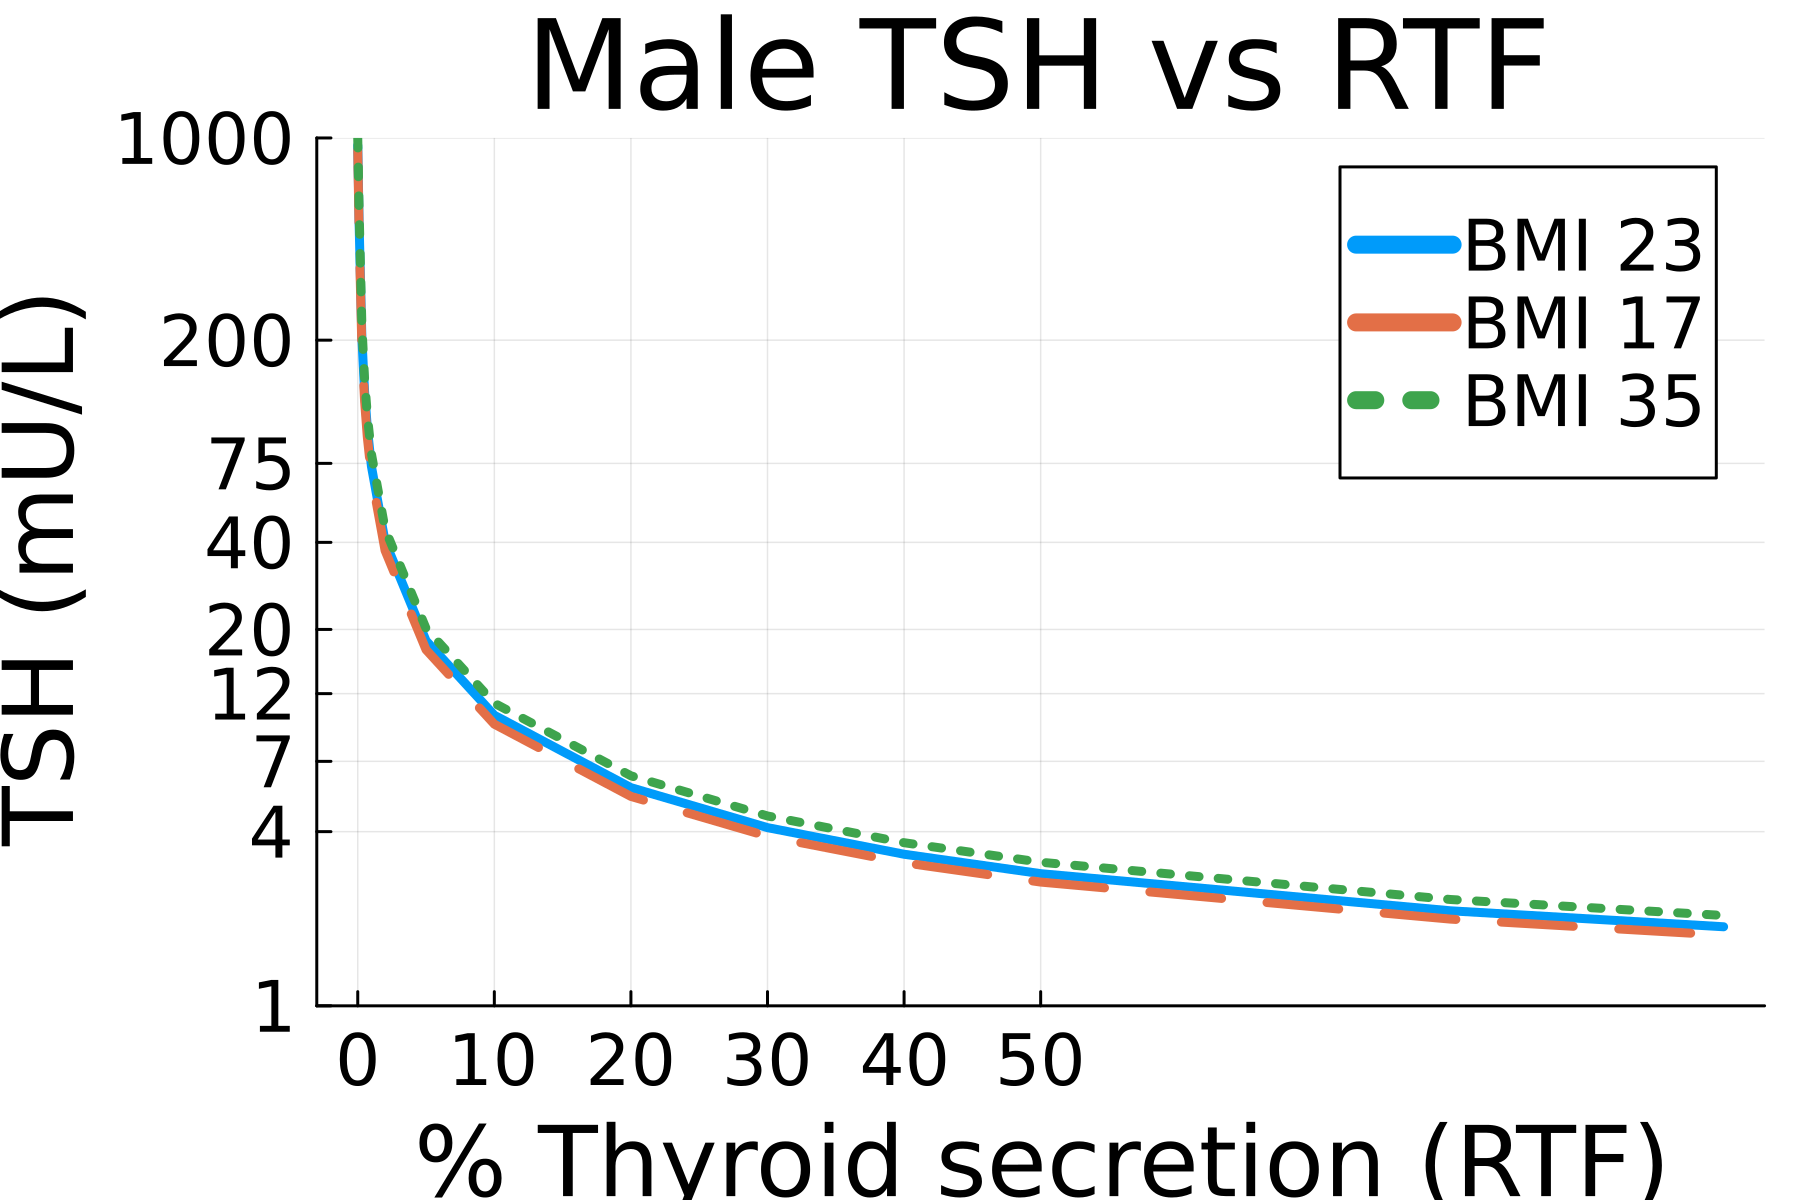

In [11]:
xticks = [string(i) for i in 0:10:50]
yticks = ["1", "4", "7", "12", "20", "40", "75", "200", "1000"]
tsh_plot = plot(RTFs, normal_TSH, yaxis=:log, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:solid, title="Male TSH vs RTF", ylim=(1, 1000),
    xticks = (0.0:0.1:0.5, xticks), yticks=([1,4,7,12,20,40,75,200,1000], yticks),
    dpi=300)
plot!(tsh_plot, RTFs, skinny_TSH, yaxis=:log, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:dash)
plot!(tsh_plot, RTFs, obese_TSH, yaxis=:log, label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="TSH (mU/L)", w=3, linestyle=:dot)

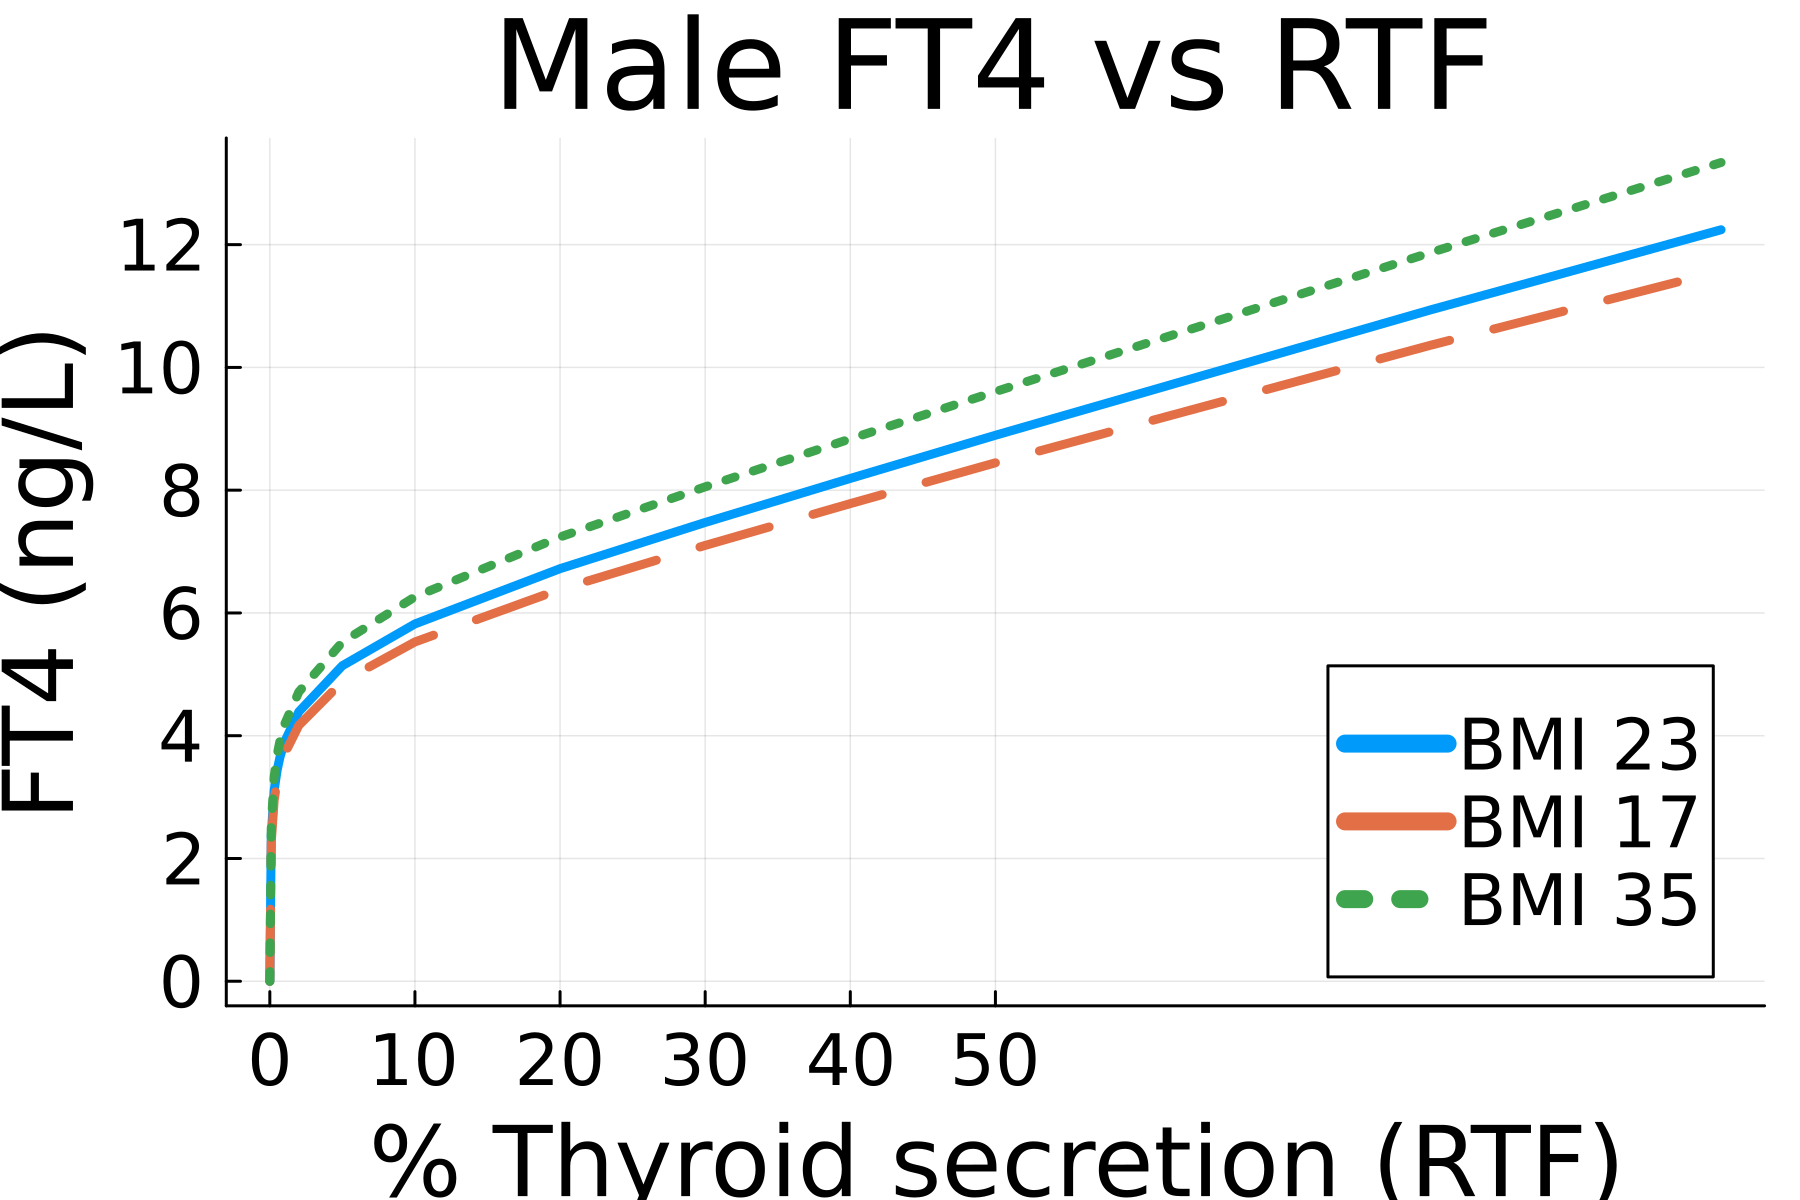

In [12]:
xticks = [string(i) for i in 0:10:50]
t4_plot = plot(RTFs, normal_FT4, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:solid, title="Male FT4 vs RTF",
    xticks = (0.0:0.1:0.5, xticks), legend=:bottomright, dpi=300)
plot!(t4_plot, RTFs, skinny_FT4, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:dash)
plot!(t4_plot, RTFs, obese_FT4,label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT4 (ng/L)", w=3, linestyle=:dot)

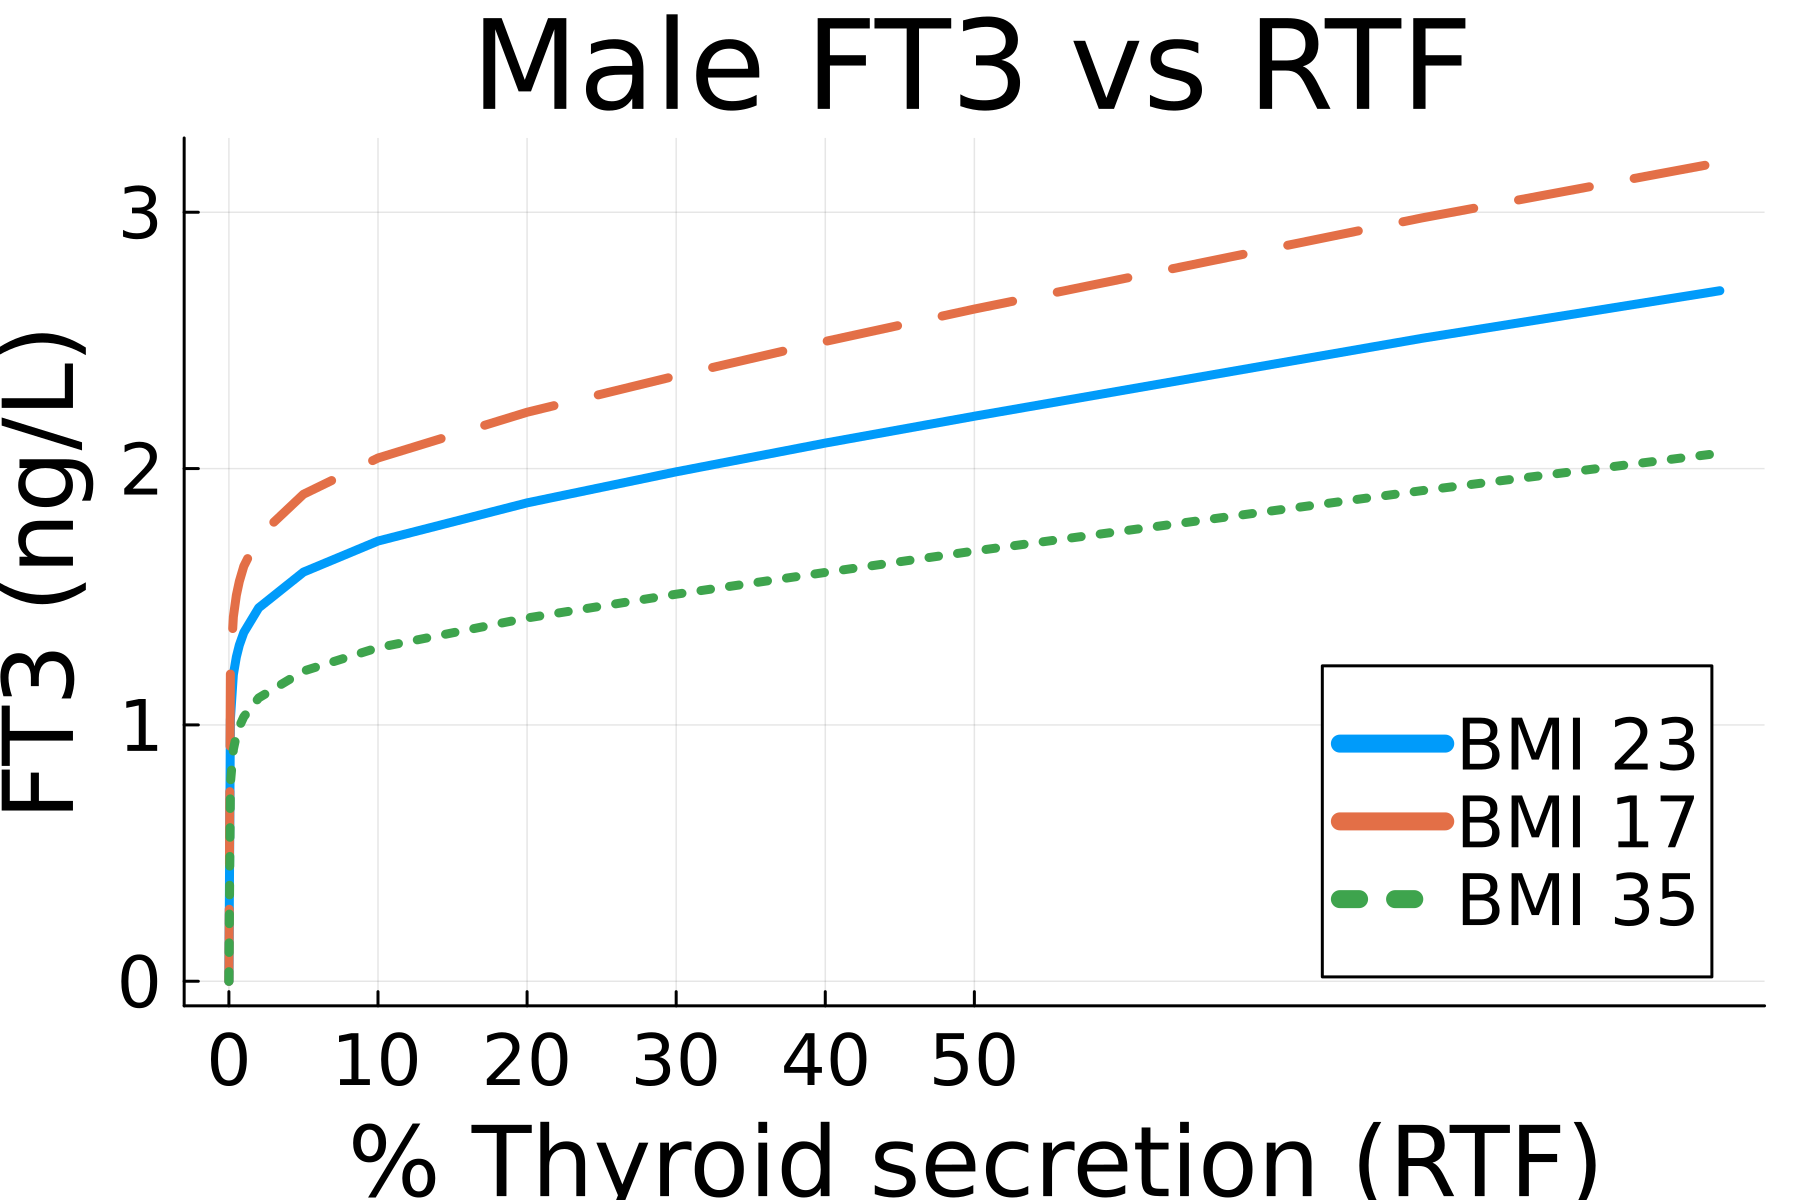

In [13]:
xticks = [string(i) for i in 0:10:50]
t3_plot = plot(RTFs, normal_FT3, label="BMI 23", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:solid, title="Male FT3 vs RTF",
    xticks = (0.0:0.1:0.5, xticks), legend=:bottomright, dpi=300)
plot!(t3_plot, RTFs, skinny_FT3, label="BMI 17", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dash)
plot!(t3_plot, RTFs, obese_FT3,label="BMI 35", xlabel="% Thyroid secretion (RTF)",
    ylabel="FT3 (ng/L)", w=3, linestyle=:dot)

# For Katarina

In [23]:
# Female
using CSV, DataFrames
df = DataFrame(
    "RTFs" => RTFs,
    "normal_TT4" => normal_TT4,
    "skinny_TT4" => skinny_TT4,
    "obese_TT4" => obese_TT4,
    "normal_FT4" => normal_FT4,
    "skinny_FT4" => skinny_FT4,
    "obese_FT4" => obese_FT4,
    "normal_TT3" => normal_TT3,
    "skinny_TT3" => skinny_TT3,
    "obese_TT3" => obese_TT3,
    "normal_FT3" => normal_FT3,
    "skinny_FT3" => skinny_FT3,
    "obese_FT3" => obese_FT3,
    "normal_TSH" => normal_TSH,
    "skinny_TSH" => skinny_TSH,
    "obese_TSH" => obese_TSH
)
CSV.write("/Users/biona001/Desktop/female.csv", df)
df

Row,RTFs,normal_TT4,skinny_TT4,obese_TT4,normal_FT4,skinny_FT4,obese_FT4,normal_TT3,skinny_TT3,obese_TT3,normal_FT3,skinny_FT3,obese_FT3,normal_TSH,skinny_TSH,obese_TSH
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,3.09863e-5,3.30655e-5,2.81905e-5,4.02976e-6,4.30016e-6,3.66618e-6,3.43426e-6,5.26688e-6,1.92793e-6,6.78266e-6,1.04021e-5,3.80767e-6,863.228,825.148,921.88
2,0.001,16.6354,15.8389,17.671,2.26202,2.13996,2.43042,0.596665,0.710381,0.448149,1.21183,1.43704,0.916667,448.212,410.973,503.998
3,0.003,21.303,20.2628,22.6572,2.93367,2.76737,3.16665,0.690556,0.823463,0.518962,1.41361,1.67702,1.0721,181.519,166.27,204.356
4,0.005,23.3643,22.2424,24.8215,3.23567,3.05248,3.49352,0.728288,0.869563,0.547181,1.49605,1.77624,1.13528,117.562,107.751,132.25
5,0.007,24.746,23.5745,26.2654,3.43999,3.24587,3.71408,0.752659,0.898522,0.565187,1.54972,1.83912,1.17601,88.2016,80.8704,99.1711
6,0.01,26.2498,25.0275,27.8322,3.66408,3.45825,3.95572,0.779011,0.931429,0.584489,1.60806,1.91069,1.21997,64.9685,59.5895,73.0147
7,0.02,29.3323,28.0141,31.0335,4.12911,3.89949,4.45691,0.830059,0.992844,0.62131,1.72237,2.04594,1.30512,35.767,32.8315,40.1567
8,0.05,33.8639,32.4202,35.7201,4.82688,4.56217,5.20916,0.900991,1.07836,0.673659,1.88391,2.2371,1.42832,16.2331,14.919,18.1979
9,0.1,37.8694,36.3311,39.8421,5.45789,5.16231,5.8894,0.960705,1.15263,0.717349,2.02239,2.40544,1.53345,8.97553,8.25823,10.048


In [15]:
# Male
using CSV, DataFrames
df = DataFrame(
    "RTFs" => RTFs,
    "normal_TT4" => normal_TT4,
    "skinny_TT4" => skinny_TT4,
    "obese_TT4" => obese_TT4,
    "normal_FT4" => normal_FT4,
    "skinny_FT4" => skinny_FT4,
    "obese_FT4" => obese_FT4,
    "normal_TT3" => normal_TT3,
    "skinny_TT3" => skinny_TT3,
    "obese_TT3" => obese_TT3,
    "normal_FT3" => normal_FT3,
    "skinny_FT3" => skinny_FT3,
    "obese_FT3" => obese_FT3,
    "normal_TSH" => normal_TSH,
    "skinny_TSH" => skinny_TSH,
    "obese_TSH" => obese_TSH
)
CSV.write("/Users/biona001/Desktop/male.csv", df)
df

Row,RTFs,normal_TT4,skinny_TT4,obese_TT4,normal_FT4,skinny_FT4,obese_FT4,normal_TT3,skinny_TT3,obese_TT3,normal_FT3,skinny_FT3,obese_FT3,normal_TSH,skinny_TSH,obese_TSH
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,2.73596e-5,2.8931e-5,2.53116e-5,3.55812e-6,3.76248e-6,3.29177e-6,2.21649e-6,3.21457e-6,1.32243e-6,4.37757e-6,6.34878e-6,2.6118e-6,941.75,905.248,997.182
2,0.001,17.3173,16.6297,18.1971,2.38688,2.27396,2.54382,0.49847,0.596382,0.373436,1.02095,1.21548,0.771562,506.02,469.904,559.116
3,0.003,22.1945,21.2957,23.3476,3.11046,2.95393,3.33261,0.578162,0.691484,0.432185,1.19641,1.42185,0.90445,205.098,190.3,226.832
4,0.005,24.324,23.3564,25.5632,3.43389,3.26038,3.68191,0.608529,0.729392,0.455551,1.26492,1.50568,0.958611,132.765,123.25,146.738
5,0.007,25.7469,24.7378,27.0378,3.65258,3.46795,3.91778,0.629,0.753696,0.470439,1.31139,1.55994,0.993569,99.5746,92.4687,110.006
6,0.01,27.2925,26.2413,28.6356,3.89251,3.69582,4.17649,0.650439,0.780069,0.486569,1.36052,1.61914,1.03172,73.3234,68.1118,80.9723
7,0.02,30.4539,29.3231,31.895,4.39104,4.16945,4.7144,0.691911,0.831192,0.517117,1.45693,1.73537,1.10538,40.34,37.4976,44.511
8,0.05,35.0886,33.8538,36.6575,5.14119,4.88193,5.52549,0.750704,0.90223,0.559489,1.59622,1.89995,1.21012,18.2902,17.0187,20.1561
9,0.1,39.1715,37.8587,40.8365,5.82153,5.52808,6.26249,0.800809,0.962032,0.595519,1.71742,2.04132,1.30137,10.1037,9.40998,11.1219
